# Create the requested data table 
### Load each data set through ETL, calculate Revenue, compare

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

plt.style.use('tableau-colorblind10')
plt.style.use('bmh')

## Loading data into tables by table type

In [17]:
path = './src_data/'
file_list = os.listdir(path) 


class LoadDataTables():
    """
    Loading, cleaning the three data tables for one download date
    """
    
    def __init__(self, download_date):
        """
        download_date (str): date the data was downloaded as csv, in filename
        
        """

        self.download_date = download_date

    def get_files_by_date(self):
        """
        for a given download date, get the relevant csv filenames that contain the data
        (products, prices, contracts)

        """
        self.filenames = [k for k in file_list if self.download_date in k]

    def csv_to_df(self, filename):
        """    
        read a csv file for a given date, 
        add filename date as new column

        Args:
            filename (str) : name of file to read  
        """
        df = pd.read_csv(path+filename, delimiter=';')
        df['download_date'] = pd.to_datetime(self.download_date)      
        return df     

    def load_data_tables(self):
        """
        based on filenames, load the three tables for a given download date
        """
        for file in self.filenames:
            if 'contracts' in file:
                self.df_contracts = self.csv_to_df(file)
            if 'products' in file:
                self.df_products = self.csv_to_df(file)
            if 'prices' in file:
                self.df_prices = self.csv_to_df(file)     
    
    def fix_dates(self):
        """
        make sure all dates are datetime format, add download date from filename as column
        """
        # fix dates to correct format
        self.df_contracts[['createdat', 'startdate', 'enddate', 'fillingdatecancellation', 'modificationdate']] = self.df_contracts[['createdat', 'startdate', 'enddate', 'fillingdatecancellation', 'modificationdate']].apply(pd.to_datetime, errors='coerce')
        self.df_products[['modificationdate']] = self.df_products[['modificationdate']].apply(pd.to_datetime, errors='coerce')
        self.df_prices[['valid_from', 'valid_until', 'modificationdate']] = self.df_prices[['valid_from', 'valid_until', 'modificationdate']].apply(pd.to_datetime, errors='coerce')

    def fix_fields(self):
        """
        change names and drop columns for consistency        
        """
        # for consistency across tables
        if 'id' in self.df_products.columns:
            self.df_products = self.df_products.rename(columns={'id':'productid'})
        # to avoid confusion, remove price id as it isn't used
        if 'id' in self.df_prices.columns:
            self.df_prices = self.df_prices.drop(columns=['id'])


In [18]:
d_2020_10 = LoadDataTables('20201001')
d_2020_10.download_date


'20201001'

In [19]:
d_2020_10.get_files_by_date()
d_2020_10.filenames

['20201001220144_contracts.csv',
 '20201001220039_prices.csv',
 '20201001220037_products.csv']

In [20]:
d_2020_10.load_data_tables()
d_2020_10.df_products

,id,productcode,productname,energy,consumptiontype,deleted,modificationdate,download_date
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-10-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-10-01
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,2020-06-07,2020-10-01
3,2001,energy,ÖkoGas A,gas,universal,0,2019-05-21,2020-10-01
4,2002,energy,ÖkoGas B,gas,universal,0,2020-06-04,2020-10-01


In [22]:
d_2020_10.fix_dates()
d_2020_10.fix_fields()
d_2020_10.df_products


,productid,productcode,productname,energy,consumptiontype,deleted,modificationdate,download_date
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-10-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-10-01
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,2020-06-07,2020-10-01
3,2001,energy,ÖkoGas A,gas,universal,0,2019-05-21,2020-10-01
4,2002,energy,ÖkoGas B,gas,universal,0,2020-06-04,2020-10-01


In [3]:
# load in each table type to create time-series; date from filename
# loading into each table type to simulate DWH
path = './src_data/'
filelist = os.listdir(path) 
print(filelist)
contracts_list = []
products_list = []
prices_list = []
for file in filelist:
    df2 = pd.read_csv(path+file, delimiter=';')
    date_from_name = file[0:8]
    df2['download_date'] = pd.to_datetime(date_from_name)
    if 'contracts' in file:
        contracts_list.append(df2)
    if 'products' in file:
        products_list.append(df2)
    if 'prices' in file:
        prices_list.append(df2)
contracts_df = pd.concat(contracts_list)
products_df = pd.concat(products_list)
prices_df = pd.concat(prices_list)

display(contracts_df.sort_values('startdate'))
display(products_df.sort_values('id'))
display(prices_df.sort_values(['productid','pricecomponentid', 'valid_from']))

['20201101220039_prices.csv', '20201101230133_contracts.csv', '20201101220035_products.csv', '20201201220101_prices.csv', '20201201220059_contracts.csv', '20210101220045_products.csv', '20201201220034_products.csv', '20201001220144_contracts.csv', '20210101220104_contracts.csv', '20210101220057_prices.csv', '20201001220039_prices.csv', '20201001220037_products.csv']


,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate,download_date
16199,16200,energy,electricity,2700.0,2860.0,2018-01-01,2018-01-01,2018-06-30,2018-06-02,fristgerecht durch Kunde,Hamburg,terminated,1000,2018-06-02,2020-11-01
24981,24982,energy,electricity,2500.0,2442.0,2018-01-01,2018-01-01,2020-03-31,2020-03-03,fristgerecht durch Kunde,Hamburg,terminated,1002,2019-08-30,2020-10-01
19890,19891,energy,electricity,2700.0,NaN,2018-01-01,2018-01-01,NaN,NaN,NaN,Berlin,indelivery,1001,2019-08-13,2020-10-01
24981,24982,energy,electricity,2500.0,2442.0,2018-01-01,2018-01-01,2020-03-31,2020-03-03,fristgerecht durch Kunde,Hamburg,terminated,1002,2019-08-30,2020-11-01
11887,11888,energy,electricity,2700.0,2657.0,2018-01-01,2018-01-01,2019-05-31,2019-04-29,fristgerecht durch LichtBlick,Brandenburg,terminated,1002,2018-07-07,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33883,33884,energy,electricity,2100.0,2030.0,2020-12-20,2022-09-29,NaN,NaN,NaN,Cologne,active,1000,2020-12-01,2021-01-01
31088,31089,energy,electricity,2300.0,2213.0,2020-10-16,2022-11-27,NaN,NaN,NaN,Stuttgart,active,1000,2020-11-05,2020-12-01
31088,31089,energy,electricity,2300.0,2213.0,2020-10-16,2022-11-27,NaN,NaN,NaN,Stuttgart,active,1000,2020-11-05,2021-01-01
30891,30892,energy,electricity,2000.0,2132.0,2020-10-20,2022-11-27,NaN,NaN,NaN,Mannheim,active,1000,2020-11-05,2021-01-01


,id,productcode,productname,energy,consumptiontype,deleted,modificationdate,download_date
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-11-01
0,1000,energy,ÖkoStrom 1,electricity,household_electricity,0,2020-12-29,2021-01-01
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-10-01
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-12-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-11-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-10-01
1,1001,energy,ÖkoStrom 2,electricity,household_electricity,0,2020-12-29,2021-01-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-12-01
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,2020-01-01,2020-11-01
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,2020-06-07,2020-10-01


,id,productid,pricecomponentid,productcomponent,price,unit,valid_from,valid_until,modificationdate,download_date
0,1,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2020-11-01
0,1,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2020-12-01
0,1,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2021-01-01
0,1,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2020-10-01
12,13,1000,1,baseprice,9.79,€/year,2020-06-01,9999-12-31,2020-05-24,2020-11-01
12,13,1000,1,baseprice,9.79,€/year,2020-06-01,9999-12-31,2020-05-24,2020-12-01
12,13,1000,1,baseprice,9.79,€/year,2020-06-01,9999-12-31,2020-05-24,2021-01-01
12,13,1000,1,baseprice,9.79,€/year,2020-06-01,9999-12-31,2020-05-24,2020-10-01
1,2,1000,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24,2020-11-01
1,2,1000,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24,2020-12-01


#### fix some simple formatting

In [4]:
# for consistency across tables
products_df = products_df.rename(columns={'id':'productid'})
# to avoid confustion, remove price - id as it isn't used
prices_df = prices_df.drop(columns=['id'])

# fix dates to correct format
contracts_df[['createdat', 'startdate', 'enddate', 'fillingdatecancellation', 'modificationdate']] = contracts_df[['createdat', 'startdate', 'enddate', 'fillingdatecancellation', 'modificationdate']].apply(pd.to_datetime, errors='coerce')
products_df[['modificationdate']] = products_df[['modificationdate']].apply(pd.to_datetime, errors='coerce')
prices_df[['valid_from', 'valid_until', 'modificationdate']] = prices_df[['valid_from', 'valid_until', 'modificationdate']].apply(pd.to_datetime, errors='coerce')

display(contracts_df.sort_values('startdate'))
display(products_df.sort_values('productid'))
display(prices_df.sort_values(['productid','pricecomponentid', 'valid_from']))

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate,download_date
16199,16200,energy,electricity,2700.0,2860.0,2018-01-01,2018-01-01,2018-06-30,2018-06-02,fristgerecht durch Kunde,Hamburg,terminated,1000,2018-06-02,2020-11-01
24981,24982,energy,electricity,2500.0,2442.0,2018-01-01,2018-01-01,2020-03-31,2020-03-03,fristgerecht durch Kunde,Hamburg,terminated,1002,2019-08-30,2020-10-01
19890,19891,energy,electricity,2700.0,NaN,2018-01-01,2018-01-01,NaT,NaT,NaN,Berlin,indelivery,1001,2019-08-13,2020-10-01
24981,24982,energy,electricity,2500.0,2442.0,2018-01-01,2018-01-01,2020-03-31,2020-03-03,fristgerecht durch Kunde,Hamburg,terminated,1002,2019-08-30,2020-11-01
11887,11888,energy,electricity,2700.0,2657.0,2018-01-01,2018-01-01,2019-05-31,2019-04-29,fristgerecht durch LichtBlick,Brandenburg,terminated,1002,2018-07-07,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33883,33884,energy,electricity,2100.0,2030.0,2020-12-20,2022-09-29,NaT,NaT,NaN,Cologne,active,1000,2020-12-01,2021-01-01
31088,31089,energy,electricity,2300.0,2213.0,2020-10-16,2022-11-27,NaT,NaT,NaN,Stuttgart,active,1000,2020-11-05,2020-12-01
31088,31089,energy,electricity,2300.0,2213.0,2020-10-16,2022-11-27,NaT,NaT,NaN,Stuttgart,active,1000,2020-11-05,2021-01-01
30891,30892,energy,electricity,2000.0,2132.0,2020-10-20,2022-11-27,NaT,NaT,NaN,Mannheim,active,1000,2020-11-05,2021-01-01


,productid,productcode,productname,energy,consumptiontype,deleted,modificationdate,download_date
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-11-01
0,1000,energy,ÖkoStrom 1,electricity,household_electricity,0,2020-12-29,2021-01-01
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-10-01
0,1000,energy,ÖkoStrom A,electricity,household_electricity,0,2020-08-27,2020-12-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-11-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-10-01
1,1001,energy,ÖkoStrom 2,electricity,household_electricity,0,2020-12-29,2021-01-01
1,1001,energy,ÖkoStrom B,electricity,household_electricity,0,2020-02-05,2020-12-01
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,2020-01-01,2020-11-01
2,1002,energy,ÖkoStrom C,electricity,household_electricity,0,2020-06-07,2020-10-01


,productid,pricecomponentid,productcomponent,price,unit,valid_from,valid_until,modificationdate,download_date
0,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2020-11-01
0,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2020-12-01
0,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2021-01-01
0,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24,2020-10-01
12,1000,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24,2020-11-01
12,1000,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24,2020-12-01
12,1000,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24,2021-01-01
12,1000,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24,2020-10-01
1,1000,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24,2020-11-01
1,1000,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24,2020-12-01


#### getting an overview of the data

In [5]:
# checking for strange values, etc.
display(contracts_df.describe())
contracts_df.info()
display(contracts_df.describe(include=object)) # if there is string data
print(contracts_df.cancellationreason.unique(), contracts_df.status.unique(), contracts_df.productid.unique())

,id,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,productid,modificationdate,download_date
count,131600.000000,1.316000e+05,122000.000000,131600,131600,22728,22728,131600.000000,131600,131600
mean,16528.387538,6.544967e+03,3625.957367,2019-07-05 01:34:25.896656384,2019-10-24 13:42:21.884498688,2019-12-05 23:05:45.934530048,2020-01-21 07:44:47.645195264,1149.810046,2020-02-07 13:29:08.133738496,2020-11-18 08:22:14.954407424
min,1.000000,1.800000e+03,1769.000000,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,1000.000000,2018-01-13 00:00:00,2020-10-01 00:00:00
25%,8225.750000,2.300000e+03,2292.000000,2018-10-07 00:00:00,2019-02-01 00:00:00,2019-05-31 00:00:00,2019-08-02 00:00:00,1000.000000,2019-09-11 00:00:00,2020-11-01 00:00:00
50%,16450.500000,2.600000e+03,2583.000000,2019-07-07 00:00:00,2019-11-01 00:00:00,2020-01-01 00:00:00,2020-02-29 00:00:00,1001.000000,2020-04-13 00:00:00,2020-12-01 00:00:00
75%,24675.250000,2.800000e+03,2897.250000,2020-04-02 00:00:00,2020-08-01 00:00:00,2020-07-31 00:00:00,2020-08-27 00:00:00,1002.000000,2020-08-18 00:00:00,2021-01-01 00:00:00
max,36100.000000,1.954786e+08,13491.000000,2020-12-31 00:00:00,2022-11-27 00:00:00,2020-12-31 00:00:00,2020-12-03 00:00:00,2001.000000,2020-12-31 00:00:00,2021-01-01 00:00:00
std,9632.088076,7.620427e+05,2743.825807,NaN,NaN,NaN,NaN,355.792520,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 131600 entries, 0 to 36099
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       131600 non-null  int64         
 1   type                     131600 non-null  object        
 2   energy                   131600 non-null  object        
 3   usage                    131600 non-null  float64       
 4   usagenet                 122000 non-null  float64       
 5   createdat                131600 non-null  datetime64[ns]
 6   startdate                131600 non-null  datetime64[ns]
 7   enddate                  22728 non-null   datetime64[ns]
 8   fillingdatecancellation  22728 non-null   datetime64[ns]
 9   cancellationreason       22728 non-null   object        
 10  city                     131600 non-null  object        
 11  status                   131600 non-null  object        
 12  productid             

,type,energy,cancellationreason,city,status
count,131600,131600,22728,131600,131600
unique,1,2,4,361,4
top,energy,electricity,fristgerecht durch Kunde,Berlin,indelivery
freq,131600,112007,7272,18801,86465


[nan 'fristgerecht durch Kunde' 'fristgerecht durch LichtBlick' 'Umzug'
 'Wiederruf'] ['indelivery' 'terminated' 'active' 'cancelled'] [1000 1002 1001 2000 2001]


In [6]:
display(prices_df.describe())
prices_df.info()
display(prices_df.describe(include=object)) # if there is string data
print(prices_df.productid.unique(), prices_df.unit.unique())

,productid,pricecomponentid,price,valid_from,valid_until,modificationdate,download_date
count,60.000000,60.000000,60.000000,60,20,60,60
mean,1334.433333,1.566667,17.497333,2019-06-20 21:12:00,2020-05-13 00:00:00,2019-11-21 08:00:00,2020-11-19 01:36:00
min,1000.000000,1.000000,4.900000,2019-01-01 00:00:00,2019-12-31 00:00:00,2018-12-23 00:00:00,2020-10-01 00:00:00
25%,1000.000000,1.000000,9.490000,2019-01-01 00:00:00,2019-12-31 00:00:00,2018-12-23 00:00:00,2020-11-01 00:00:00
50%,1002.000000,2.000000,13.990000,2019-01-01 00:00:00,2020-05-31 00:00:00,2019-12-22 00:00:00,2020-12-01 00:00:00
75%,2001.000000,2.000000,29.300000,2020-01-01 00:00:00,2020-05-31 00:00:00,2020-05-24 00:00:00,2021-01-01 00:00:00
max,2002.000000,2.000000,29.900000,2021-10-01 00:00:00,2020-12-31 00:00:00,2020-12-28 00:00:00,2021-01-01 00:00:00
std,475.668499,0.499717,10.146372,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 13
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productid         60 non-null     int64         
 1   pricecomponentid  60 non-null     int64         
 2   productcomponent  60 non-null     object        
 3   price             60 non-null     float64       
 4   unit              60 non-null     object        
 5   valid_from        60 non-null     datetime64[ns]
 6   valid_until       20 non-null     datetime64[ns]
 7   modificationdate  60 non-null     datetime64[ns]
 8   download_date     60 non-null     datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(2)
memory usage: 4.7+ KB


,productcomponent,unit
count,60,60
unique,2,2
top,workingprice,€/year
freq,34,30


[1000 1001 1002 2001 2002] ['€/year' 'ct/kwh']


In [7]:
display(products_df.describe())
products_df.info()
display(products_df.describe(include=object)) # if there is string data
print(products_df.productid.unique(), products_df.consumptiontype.unique())

,productid,deleted,modificationdate,download_date
count,23.000000,23.000000,23,23
mean,2392.478261,0.086957,2020-06-05 02:05:13.043478272,2020-11-18 00:00:00
min,1000.000000,0.000000,2019-05-21 00:00:00,2020-10-01 00:00:00
25%,1001.000000,0.000000,2020-02-05 00:00:00,2020-11-01 00:00:00
50%,1002.000000,0.000000,2020-06-07 00:00:00,2020-12-01 00:00:00
75%,2002.000000,0.000000,2020-12-02 00:00:00,2020-12-16 12:00:00
max,9001.000000,1.000000,2020-12-29 00:00:00,2021-01-01 00:00:00
std,2658.392728,0.288104,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   productid         23 non-null     int64         
 1   productcode       23 non-null     object        
 2   productname       23 non-null     object        
 3   energy            23 non-null     object        
 4   consumptiontype   23 non-null     object        
 5   deleted           23 non-null     int64         
 6   modificationdate  23 non-null     datetime64[ns]
 7   download_date     23 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 1.6+ KB


,productcode,productname,energy,consumptiontype
count,23,23,23,23
unique,1,11,2,2
top,energy,ÖkoStrom A,electricity,household_electricity
freq,23,3,15,15


[1000 1001 1002 2001 2002 9001] ['household_electricity' 'universal']


### Notes, assumptions, questions:
- enddate of NaN means the contract has not been terminated
- what is date in filename? when data was provided, but does not seem related to any other date
- there are apparently duplicate rows, need to remove
- check for missing data
- look for outliers in useage, dates, ...
- isolate most recent product names
- 

## Checking data and cleaning - Prices and Prodcuts

#### Getting the current prices and products

In [11]:
prices_current_df = prices_df.sort_values(by=['productid',
                                              'pricecomponentid', 
                                              'valid_from', 
                                              'modificationdate']).drop_duplicates(subset=['productid',
                                                                                           'pricecomponentid', 
                                                                                           'valid_from'], 
                                                                                           keep="last")
prices_current_df.sort_values(by=['productid',
                                              'pricecomponentid', 
                                              'valid_from', 
                                              'modificationdate'])

,id,productid,pricecomponentid,productcomponent,price,unit,valid_from,valid_until,modificationdate
0,1,1000,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24
12,13,1000,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24
1,2,1000,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24
13,14,1000,2,workingprice,29.90,ct/kwh,2020-06-01,NaT,2020-05-24
2,3,1001,1,baseprice,9.99,€/year,2019-01-01,NaT,2018-12-23
4,5,1001,2,workingprice,29.40,ct/kwh,2019-01-01,2019-12-31,2019-12-22
11,12,1001,2,workingprice,29.30,ct/kwh,2020-01-01,NaT,2019-12-22
3,4,1002,1,baseprice,9.49,€/year,2019-01-01,NaT,2018-12-23
5,6,1002,2,workingprice,28.90,ct/kwh,2019-01-01,2019-12-31,2019-12-22
10,11,1002,2,workingprice,29.10,€/year,2020-01-01,NaT,2019-12-22


In [12]:
products_current_df = products_df.sort_values(by=['productid',
                                              'energy',  
                                              'modificationdate']).drop_duplicates(subset=['productid',
                                                                                           'energy'],
                                                                                           keep="last")
products_current_df.sort_values(by=['productid',
                                              'energy',  
                                              'modificationdate'])

,productid,productcode,productname,energy,consumptiontype,deleted,modificationdate
0,1000,energy,ÖkoStrom 1,electricity,household_electricity,0,2020-12-29
1,1001,energy,ÖkoStrom 2,electricity,household_electricity,0,2020-12-29
2,1002,energy,ÖkoStrom 3,electricity,household_electricity,0,2020-12-29
3,2001,energy,ÖkoGas 1,gas,universal,0,2020-12-29
4,2002,energy,ÖkoGas 2,gas,universal,0,2020-12-29
5,9001,energy,ÖkoTest A,electricity,household_electricity,1,2020-12-02


#### Check if product_ids are in all tables

In [13]:
products_df.productid.unique(), prices_df.productid.unique(), contracts_df.productid.unique()

(array([1000, 1001, 1002, 2001, 2002, 9001]),
 array([1000, 1001, 1002, 2001, 2002]),
 array([1000, 1002, 1001, 2000, 2001]))

- 9001 has no price info and no contracts connected to it

## Checking data and cleaning - Contracts

#### Remove duplicate contracts

In [14]:
print(contracts_df.shape)
contracts_df = contracts_df.drop_duplicates()
print(contracts_df.shape)
contracts_df

(131600, 14)
(37393, 14)


,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
0,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,NaT,NaT,NaN,Wuppertal,indelivery,1000,2020-04-17
1,2,energy,electricity,2700.0,2569.0,2018-01-26,2018-10-01,NaT,NaT,NaN,Cologne,indelivery,1000,2020-02-06
2,3,energy,electricity,2900.0,2760.0,2019-04-09,2019-09-01,NaT,NaT,NaN,Berlin,indelivery,1002,2020-01-20
3,4,energy,electricity,2500.0,2391.0,2019-09-27,2019-11-01,2020-02-29,2020-02-01,fristgerecht durch Kunde,Dortmund,terminated,1000,2020-02-01
4,5,energy,electricity,2200.0,2178.0,2020-04-01,2020-11-01,NaT,NaT,NaN,Hannover,active,1001,2020-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36095,36096,energy,electricity,2500.0,2457.0,2020-12-14,2021-06-01,NaT,NaT,NaN,Oldenburg,active,1001,2020-12-01
36096,36097,energy,electricity,3000.0,2891.0,2020-12-29,2021-01-01,NaT,NaT,NaN,Osnabrück,active,1001,2020-12-31
36097,36098,energy,electricity,2400.0,2281.0,2020-12-05,2021-06-01,NaT,NaT,NaN,Berlin,active,1000,2020-12-01
36098,36099,energy,electricity,2600.0,2535.0,2020-12-28,2021-02-01,NaT,NaT,NaN,Berlin,active,1000,2020-12-30


#### Look for missing data fields that are necessary

In [15]:
contracts_df[contracts_df.type.isna() | contracts_df.energy.isna() ]



,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate


In [16]:
contracts_df[contracts_df.usage.isna() ]

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate


In [17]:
contracts_df[contracts_df.usagenet.isna() ]


,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
20,21,energy,electricity,2400.0,NaN,2019-06-17,2019-10-01,NaT,NaT,NaN,Hamburg,indelivery,1001,2020-05-01
29,30,energy,electricity,2500.0,NaN,2020-09-12,2020-10-01,NaT,NaT,NaN,Berlin,indelivery,1000,2020-09-26
34,35,energy,electricity,1900.0,NaN,2018-07-03,2019-03-01,NaT,NaT,NaN,Berlin,indelivery,1002,2020-01-03
41,42,energy,electricity,2600.0,NaN,2020-01-06,2020-03-01,NaT,NaT,NaN,Nordhorn,indelivery,1000,2020-06-11
49,50,energy,electricity,2600.0,NaN,2019-10-12,2020-03-01,NaT,NaT,NaN,Herne,indelivery,1001,2020-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19335,19336,energy,electricity,2100.0,NaN,2020-08-14,2022-07-29,NaT,NaT,NaN,Duisburg,active,1002,2020-12-01
20647,20648,energy,gas,11400.0,NaN,2020-07-23,2021-06-01,NaT,NaT,NaN,Wiesbaden,active,2000,2020-12-01
21416,21417,energy,gas,11700.0,NaN,2020-09-22,2021-07-29,NaT,NaT,NaN,Braunschweig,active,2000,2020-12-01
22880,22881,energy,electricity,2300.0,NaN,2020-05-11,2022-06-29,NaT,NaT,NaN,Cologne,active,1002,2020-12-01


In [18]:
contracts_df[contracts_df.startdate.isna()]


,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate


In [19]:
contracts_df[ contracts_df.productid.isna()]

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate


- "usagenet" missing for many accounts; for simplicity just use "usage" and not "usagenet

#### Looking for outliers

<Axes: xlabel='id', ylabel='usage'>

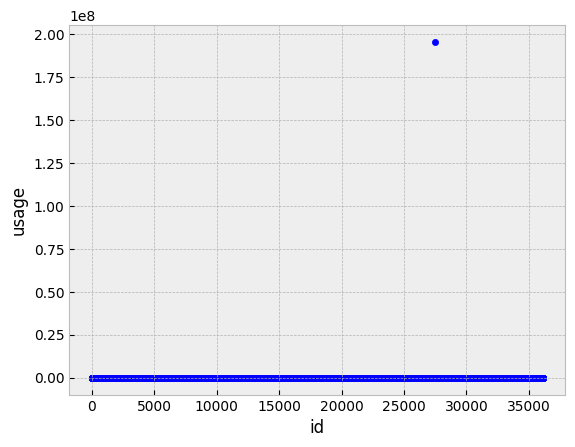

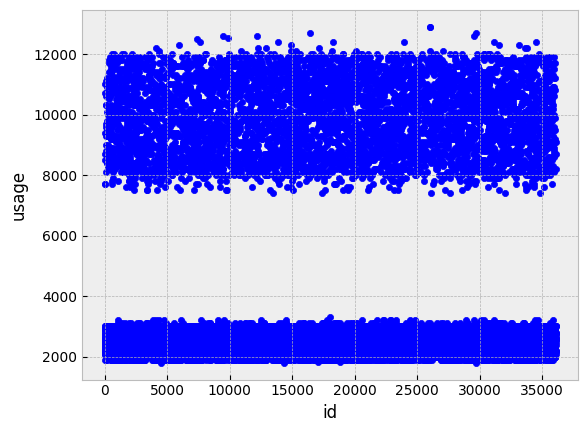

In [20]:
contracts_df.plot.scatter(x='id', y='usage')

contracts_df[contracts_df.usage < 1e8].plot.scatter(x='id', y='usage')

- 1 outlier found, dropping:

In [21]:
contracts_df = contracts_df[contracts_df.usage < 1e8]
contracts_df


,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
0,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,NaT,NaT,NaN,Wuppertal,indelivery,1000,2020-04-17
1,2,energy,electricity,2700.0,2569.0,2018-01-26,2018-10-01,NaT,NaT,NaN,Cologne,indelivery,1000,2020-02-06
2,3,energy,electricity,2900.0,2760.0,2019-04-09,2019-09-01,NaT,NaT,NaN,Berlin,indelivery,1002,2020-01-20
3,4,energy,electricity,2500.0,2391.0,2019-09-27,2019-11-01,2020-02-29,2020-02-01,fristgerecht durch Kunde,Dortmund,terminated,1000,2020-02-01
4,5,energy,electricity,2200.0,2178.0,2020-04-01,2020-11-01,NaT,NaT,NaN,Hannover,active,1001,2020-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36095,36096,energy,electricity,2500.0,2457.0,2020-12-14,2021-06-01,NaT,NaT,NaN,Oldenburg,active,1001,2020-12-01
36096,36097,energy,electricity,3000.0,2891.0,2020-12-29,2021-01-01,NaT,NaT,NaN,Osnabrück,active,1001,2020-12-31
36097,36098,energy,electricity,2400.0,2281.0,2020-12-05,2021-06-01,NaT,NaT,NaN,Berlin,active,1000,2020-12-01
36098,36099,energy,electricity,2600.0,2535.0,2020-12-28,2021-02-01,NaT,NaT,NaN,Berlin,active,1000,2020-12-30


<Axes: xlabel='id', ylabel='startdate'>

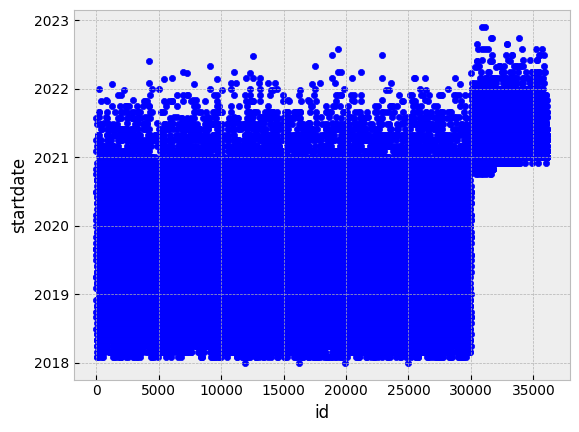

In [22]:
contracts_df.plot.scatter(x='id', y='startdate')

# contracts_df[contracts_df.usage < 1e8].plot.scatter(x='id', y='usage')

In [23]:
contracts_df

,id,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,city,status,productid,modificationdate
0,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,NaT,NaT,NaN,Wuppertal,indelivery,1000,2020-04-17
1,2,energy,electricity,2700.0,2569.0,2018-01-26,2018-10-01,NaT,NaT,NaN,Cologne,indelivery,1000,2020-02-06
2,3,energy,electricity,2900.0,2760.0,2019-04-09,2019-09-01,NaT,NaT,NaN,Berlin,indelivery,1002,2020-01-20
3,4,energy,electricity,2500.0,2391.0,2019-09-27,2019-11-01,2020-02-29,2020-02-01,fristgerecht durch Kunde,Dortmund,terminated,1000,2020-02-01
4,5,energy,electricity,2200.0,2178.0,2020-04-01,2020-11-01,NaT,NaT,NaN,Hannover,active,1001,2020-07-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36095,36096,energy,electricity,2500.0,2457.0,2020-12-14,2021-06-01,NaT,NaT,NaN,Oldenburg,active,1001,2020-12-01
36096,36097,energy,electricity,3000.0,2891.0,2020-12-29,2021-01-01,NaT,NaT,NaN,Osnabrück,active,1001,2020-12-31
36097,36098,energy,electricity,2400.0,2281.0,2020-12-05,2021-06-01,NaT,NaT,NaN,Berlin,active,1000,2020-12-01
36098,36099,energy,electricity,2600.0,2535.0,2020-12-28,2021-02-01,NaT,NaT,NaN,Berlin,active,1000,2020-12-30


## Calculate Revenue for each contract

- = base price + consumption * working price

In [60]:
contracts_w_price_df = contracts_df.merge(prices_current_df, left_on='productid', right_on='productid')
contracts_w_price_df

contracts_w_price_df[['id_x','productcomponent', 'price', 'unit', 'startdate', 'valid_from', 'enddate', 'valid_until']]

# to do:
# - drop id in prices_df
# - need to group by contract id, and apply prices to correct date ranges... HOW?
# - break usage to daily value, and apply to ranges valid_from to valid_until
# - but then need to limit based on startdate ...

,id_x,productcomponent,price,unit,startdate,valid_from,enddate,valid_until
0,1,baseprice,8.99,€/year,2018-12-01,2019-01-01,NaT,2020-05-31
1,1,baseprice,9.79,€/year,2018-12-01,2020-06-01,NaT,NaT
2,1,workingprice,29.80,ct/kwh,2018-12-01,2019-01-01,NaT,2020-05-31
3,1,workingprice,29.90,ct/kwh,2018-12-01,2020-06-01,NaT,NaT
4,2,baseprice,8.99,€/year,2018-10-01,2019-01-01,NaT,2020-05-31
...,...,...,...,...,...,...,...,...
117049,36099,workingprice,29.90,ct/kwh,2021-02-01,2020-06-01,NaT,NaT
117050,36100,baseprice,8.99,€/year,2021-02-01,2019-01-01,NaT,2020-05-31
117051,36100,baseprice,9.79,€/year,2021-02-01,2020-06-01,NaT,NaT
117052,36100,workingprice,29.80,ct/kwh,2021-02-01,2019-01-01,NaT,2020-05-31


In [56]:
# set enddate to today's date
contracts_w_price_df['enddate'] = contracts_w_price_df['enddate'].fillna(value=pd.to_datetime('today').normalize())

# set price valid_to date to today if greater than today (not interested in future prices)
contracts_w_price_df

,id_x,type,energy,usage,usagenet,createdat,startdate,enddate,fillingdatecancellation,cancellationreason,...,productid,modificationdate_x,id_y,pricecomponentid,productcomponent,price,unit,valid_from,valid_until,modificationdate_y
0,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,2024-05-13,NaT,NaN,...,1000,2020-04-17,1,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24
1,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,2024-05-13,NaT,NaN,...,1000,2020-04-17,13,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24
2,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,2024-05-13,NaT,NaN,...,1000,2020-04-17,2,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24
3,1,energy,electricity,2100.0,2084.0,2018-03-12,2018-12-01,2024-05-13,NaT,NaN,...,1000,2020-04-17,14,2,workingprice,29.90,ct/kwh,2020-06-01,NaT,2020-05-24
4,2,energy,electricity,2700.0,2569.0,2018-01-26,2018-10-01,2024-05-13,NaT,NaN,...,1000,2020-02-06,1,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117049,36099,energy,electricity,2600.0,2535.0,2020-12-28,2021-02-01,2024-05-13,NaT,NaN,...,1000,2020-12-30,14,2,workingprice,29.90,ct/kwh,2020-06-01,NaT,2020-05-24
117050,36100,energy,electricity,3000.0,2816.0,2020-12-30,2021-02-01,2024-05-13,NaT,NaN,...,1000,2020-12-31,1,1,baseprice,8.99,€/year,2019-01-01,2020-05-31,2020-05-24
117051,36100,energy,electricity,3000.0,2816.0,2020-12-30,2021-02-01,2024-05-13,NaT,NaN,...,1000,2020-12-31,13,1,baseprice,9.79,€/year,2020-06-01,NaT,2020-05-24
117052,36100,energy,electricity,3000.0,2816.0,2020-12-30,2021-02-01,2024-05-13,NaT,NaN,...,1000,2020-12-31,2,2,workingprice,29.80,ct/kwh,2019-01-01,2020-05-31,2020-05-24


In [58]:
# drop any prices that aren't applicable, i.e. price date is outside start-end date

contracts_w_price_df = contracts_w_price_df.drop(
    contracts_w_price_df
    [
        (contracts_w_price_df.enddate < contracts_w_price_df.valid_from)
        | (contracts_w_price_df.startdate > contracts_w_price_df.valid_until)
    ].index)

contracts_w_price_df[['id_x','productcomponent', 'price', 'startdate', 'valid_from', 'enddate', 'valid_until']]

,id_x,productcomponent,price,startdate,valid_from,enddate,valid_until
0,1,baseprice,8.99,2018-12-01,2019-01-01,2024-05-13,2020-05-31
1,1,baseprice,9.79,2018-12-01,2020-06-01,2024-05-13,NaT
2,1,workingprice,29.80,2018-12-01,2019-01-01,2024-05-13,2020-05-31
3,1,workingprice,29.90,2018-12-01,2020-06-01,2024-05-13,NaT
4,2,baseprice,8.99,2018-10-01,2019-01-01,2024-05-13,2020-05-31
...,...,...,...,...,...,...,...
117045,36098,workingprice,29.90,2021-06-01,2020-06-01,2024-05-13,NaT
117047,36099,baseprice,9.79,2021-02-01,2020-06-01,2024-05-13,NaT
117049,36099,workingprice,29.90,2021-02-01,2020-06-01,2024-05-13,NaT
117051,36100,baseprice,9.79,2021-02-01,2020-06-01,2024-05-13,NaT


In [51]:
# get start and end date of each price, depending on 
contracts_w_price_df['date_from'] = contracts_w_price_df[['startdate', 'valid_from']].max(axis=1)
contracts_w_price_df['date_to'] = contracts_w_price_df[['enddate', 'valid_until']].min(axis=1)

contracts_w_price_df['date_to'] = contracts_w_price_df['date_to'].fillna(value=pd.to_datetime('today').normalize())

contracts_w_price_df[['id_x','productcomponent', 'price', 'startdate', 'valid_from', 'enddate', 'valid_until', 'date_from', 'date_to']]

,id_x,productcomponent,price,startdate,valid_from,enddate,valid_until,date_from,date_to
0,1,baseprice,8.99,2018-12-01,2019-01-01,NaT,2020-05-31,2019-01-01,2020-05-31
1,1,baseprice,9.79,2018-12-01,2020-06-01,NaT,NaT,2020-06-01,2024-05-13
2,1,workingprice,29.80,2018-12-01,2019-01-01,NaT,2020-05-31,2019-01-01,2020-05-31
3,1,workingprice,29.90,2018-12-01,2020-06-01,NaT,NaT,2020-06-01,2024-05-13
4,2,baseprice,8.99,2018-10-01,2019-01-01,NaT,2020-05-31,2019-01-01,2020-05-31
...,...,...,...,...,...,...,...,...,...
117049,36099,workingprice,29.90,2021-02-01,2020-06-01,NaT,NaT,2021-02-01,2024-05-13
117050,36100,baseprice,8.99,2021-02-01,2019-01-01,NaT,2020-05-31,2021-02-01,2020-05-31
117051,36100,baseprice,9.79,2021-02-01,2020-06-01,NaT,NaT,2021-02-01,2024-05-13
117052,36100,workingprice,29.80,2021-02-01,2019-01-01,NaT,2020-05-31,2021-02-01,2020-05-31


In [48]:
contracts_w_price_df.date_to

0        2020-05-31 00:00:00.000000
1        2024-05-13 08:41:29.462518
2        2020-05-31 00:00:00.000000
3        2024-05-13 08:41:29.462518
4        2020-05-31 00:00:00.000000
                    ...            
117049   2024-05-13 08:41:29.462518
117050   2020-05-31 00:00:00.000000
117051   2024-05-13 08:41:29.462518
117052   2020-05-31 00:00:00.000000
117053   2024-05-13 08:41:29.462518
Name: date_to, Length: 117054, dtype: datetime64[ns]